In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random 

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


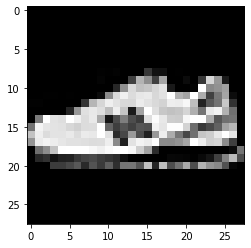

In [3]:
i = random.randint(1,60000) 
plt.imshow( X_train[i] , cmap = 'gray') 

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
noise_factor = 0.2

noise_dataset = []

for img in X_train:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_dataset.append(noisy_image)
noise_dataset = np.array(noise_dataset)

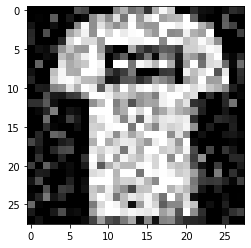

In [6]:
plt.imshow(noise_dataset[1], cmap="gray")

In [7]:
noise_test_set = []
for img in X_test:
  noisy_image = img + noise_factor * np.random.randn(*img.shape)
  noisy_image = np.clip(noisy_image, 0., 1.)
  noise_test_set.append(noisy_image)
  
noise_test_set = np.array(noise_test_set)


In [8]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))

#Encoded image
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))

#Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))

In [9]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [11]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),          
                X_train.reshape(-1, 28, 28, 1), 
                epochs=20, 
                batch_size=200, 
                validation_data=(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))


Epoch 1/20
300/300 [==============================] - 12s 39ms/step - loss: 0.3075 - val_loss: 0.3048
Epoch 2/20
300/300 [==============================] - 11s 38ms/step - loss: 0.2994 - val_loss: 0.2993
Epoch 3/20
300/300 [==============================] - 11s 38ms/step - loss: 0.2952 - val_loss: 0.2960
Epoch 4/20
300/300 [==============================] - 11s 38ms/step - loss: 0.2928 - val_loss: 0.2941
Epoch 5/20
300/300 [==============================] - 11s 38ms/step - loss: 0.2912 - val_loss: 0.2927
Epoch 6/20
300/300 [==============================] - 11s 38ms/step - loss: 0.2900 - val_loss: 0.2918
Epoch 7/20
300/300 [==============================] - 12s 38ms/step - loss: 0.2892 - val_loss: 0.2912
Epoch 8/20
300/300 [==============================] - 11s 38ms/step - loss: 0.2887 - val_loss: 0.2907
Epoch 9/20
300/300 [==============================] - 11s 38ms/step - loss: 0.2883 - val_loss: 0.2903
Epoch 10/20
300/300 [==============================] - 11s 38ms/step - loss: 0.288

In [12]:
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))

313/313 [==============================] - 1s 4ms/step - loss: 0.2886


In [13]:
predicted = autoencoder.predict(noise_test_set[:10].reshape(-1, 28, 28, 1))

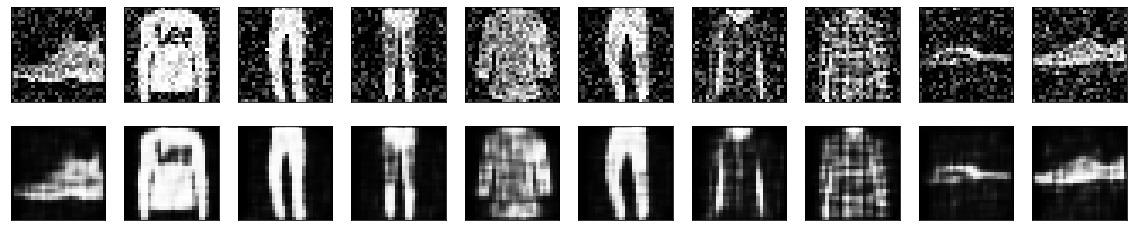

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)